# Q4-Problem Statement:
Imagine you working as a sale manager now you need to predict the Revenue and whether that particular revenue is on the weekend or not and find the Informational_Duration using the Ensemble learning algorithm Dataset

Link: https://www.kaggle.com/datasets/henrysue/online-shoppers-intention

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Data Loading

In [2]:
df=pd.read_csv('online_shoppers_intention.csv')

In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Data Understanding

In [4]:
types = df.dtypes; nulls = df.isna().sum(); null_percent = df.isna().sum()/len(df)*100
column_summary = pd.concat([types,nulls,null_percent], axis = 1)
column_summary.columns = ['data_type', 'null_count', 'null_percent']
print(column_summary)

                        data_type  null_count  null_percent
Administrative              int64           0           0.0
Administrative_Duration   float64           0           0.0
Informational               int64           0           0.0
Informational_Duration    float64           0           0.0
ProductRelated              int64           0           0.0
ProductRelated_Duration   float64           0           0.0
BounceRates               float64           0           0.0
ExitRates                 float64           0           0.0
PageValues                float64           0           0.0
SpecialDay                float64           0           0.0
Month                      object           0           0.0
OperatingSystems            int64           0           0.0
Browser                     int64           0           0.0
Region                      int64           0           0.0
TrafficType                 int64           0           0.0
VisitorType                object       

## Target column for revenue

Since we need to find both revenu and if it was a weekend, we will mearge these two features to create a column called **'target'** which will contain three values: *weekend_revenue, non_weekend_revenue, no_revenue*

In [5]:
df['Weekend']=df['Weekend'].astype(str)
df['Revenue']=df['Revenue'].astype(str)

In [6]:
l = list()
for weekend, revenue in zip(df['Weekend'], df['Revenue']):
    if weekend == 'True' and revenue == 'True':
        l.append('weekend_revenue')
    elif weekend == 'False' and revenue == 'True':
        l.append('non_weekend_revenue')
    else :
        l.append('no_revenue')
df['target']=l

# DATA ANALYSIS

In [7]:
df_num= df.select_dtypes(include=np.number)
df_category=df.select_dtypes(include='O')

## Univariate Analysis

### Numerical Data Analysis

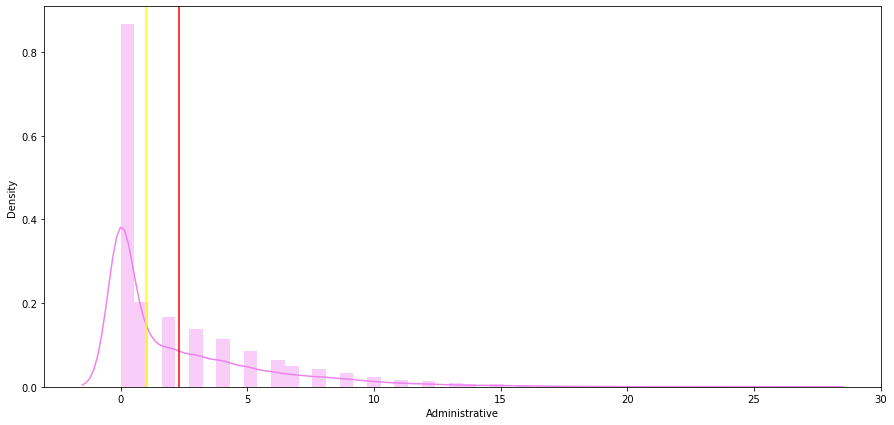

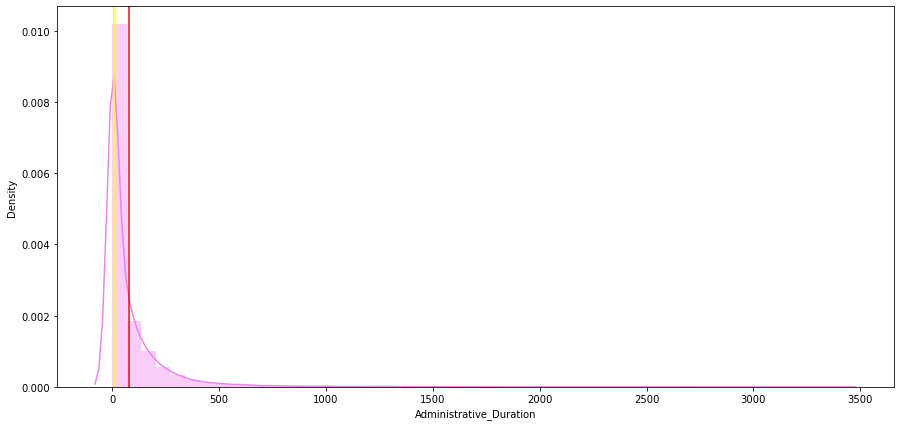

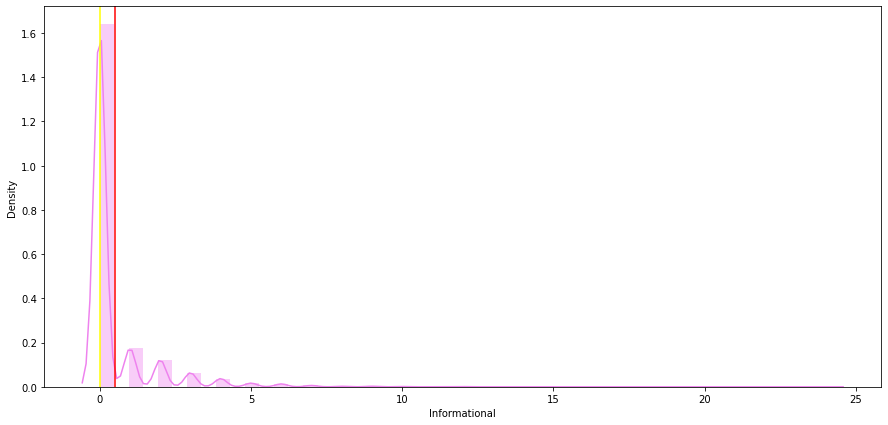

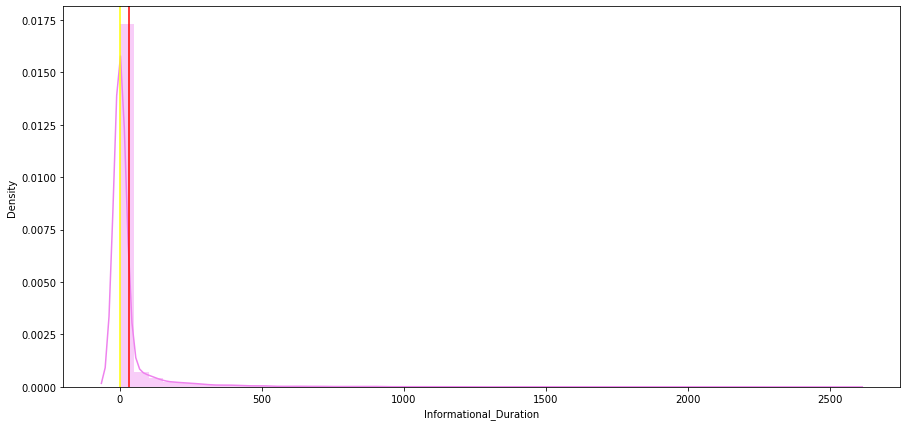

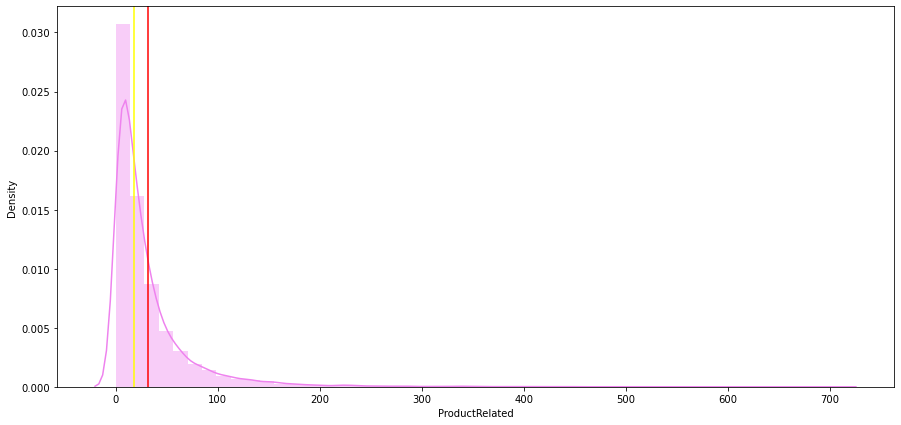

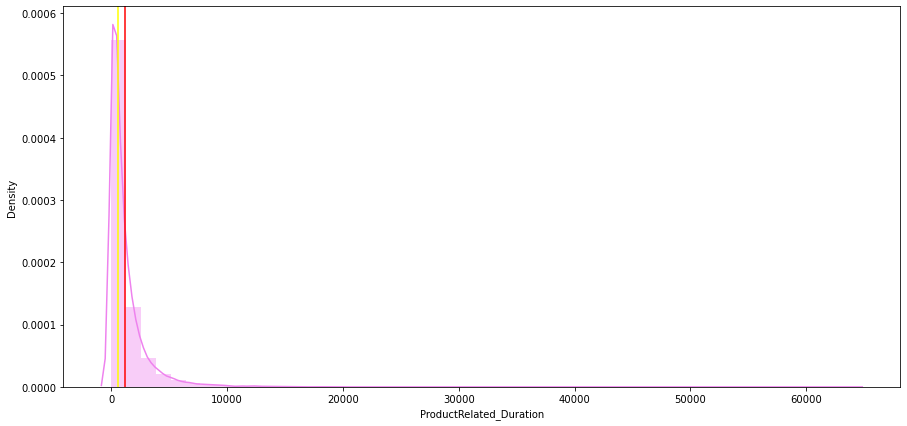

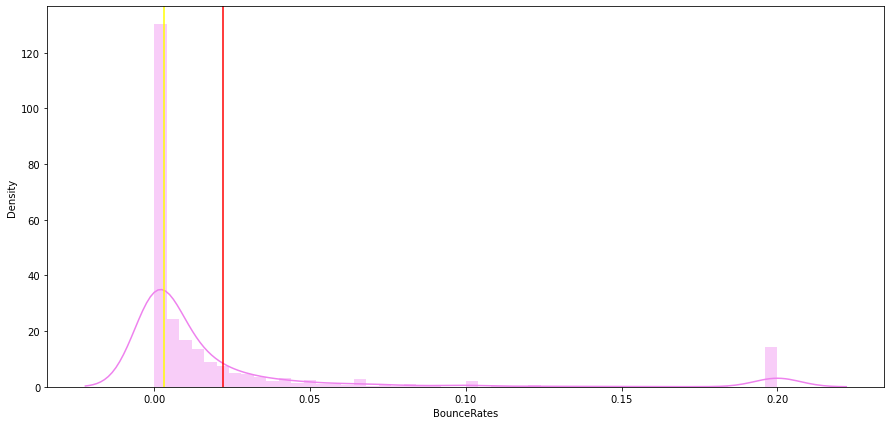

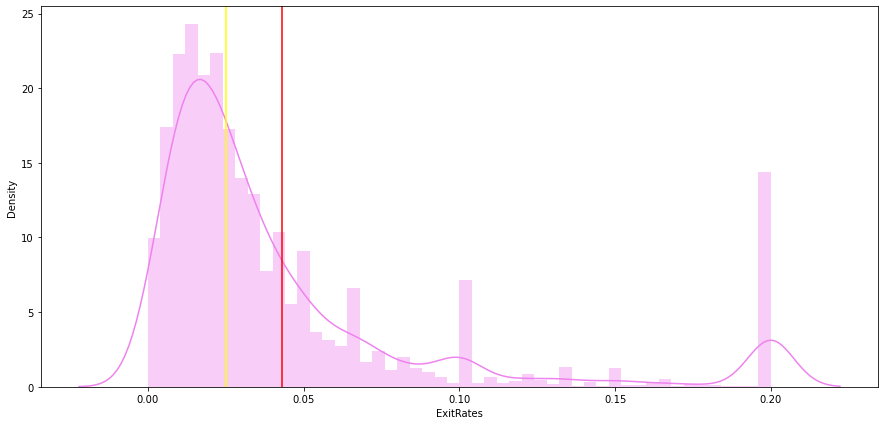

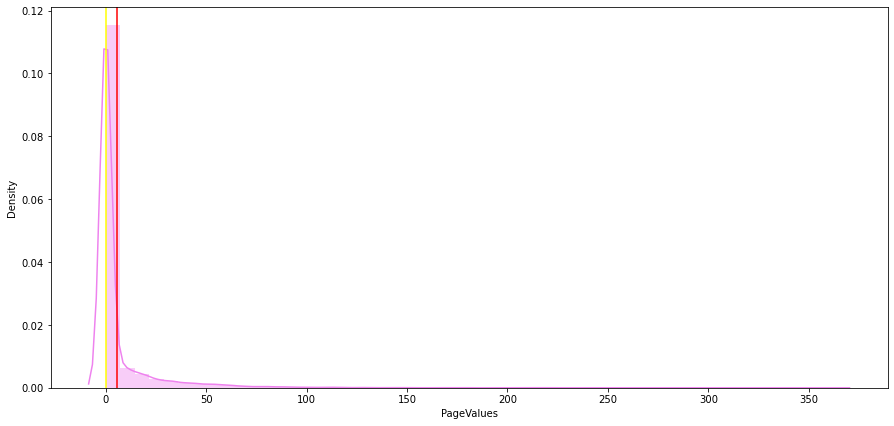

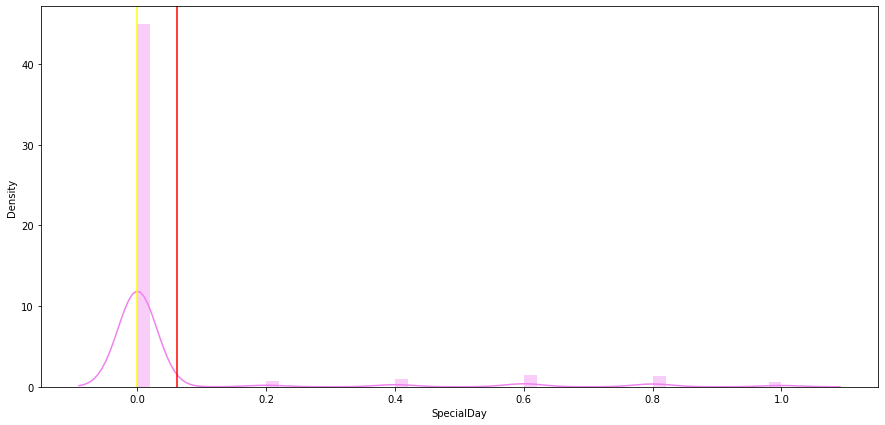

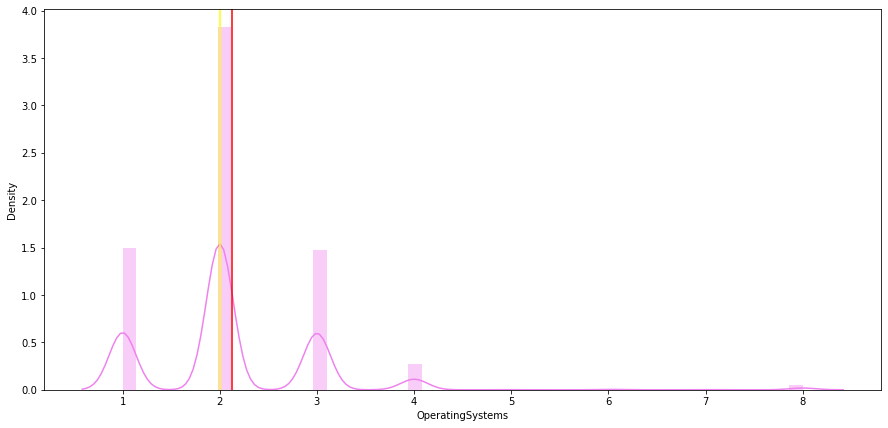

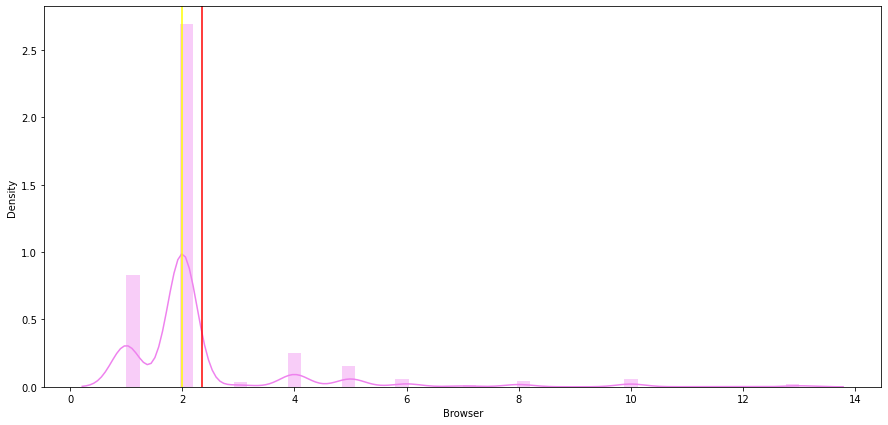

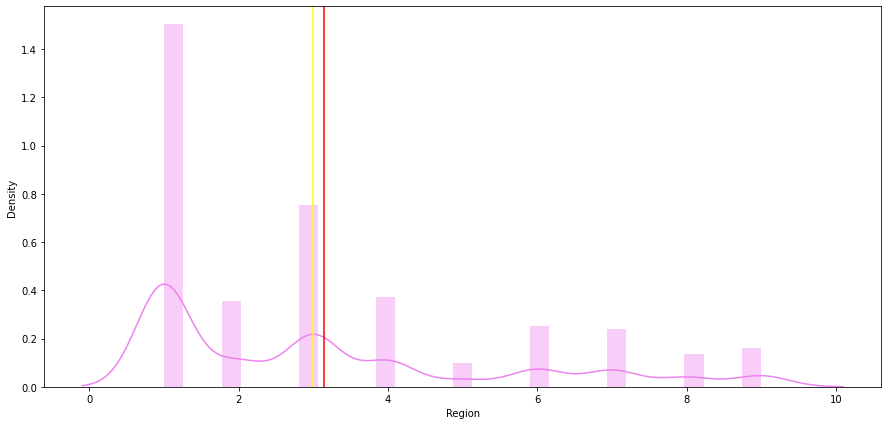

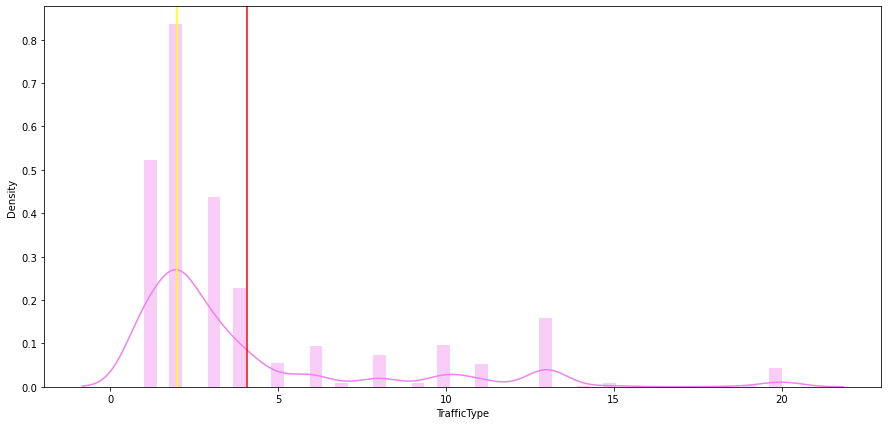

In [112]:
for i in df_num.columns:
    plt.figure(figsize =(15,7))
    sns.distplot(df_num[i], color = 'violet')
    plt.axvline(x = np.mean(df_num[i]), color = 'red')
    plt.axvline(x = np.median(df_num[i]), color = 'yellow')
    plt.show()

### Categorical Data

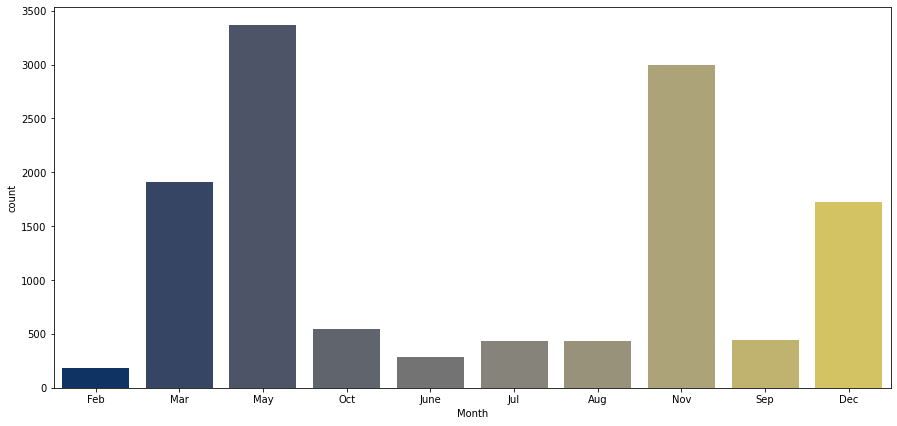

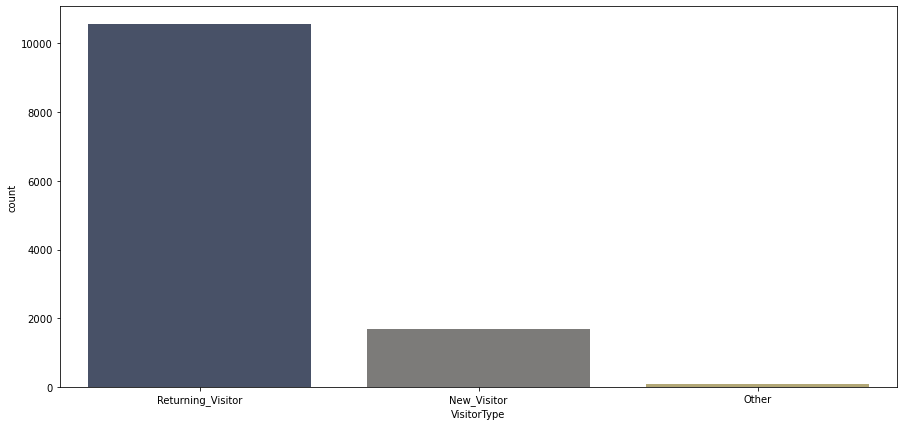

In [113]:
for i in df_category.drop(['Weekend', 'Revenue', 'target'], axis = 1):
    plt.figure(figsize =(15,7))
    sns.countplot(df_category[i], palette='cividis')
    plt.show()

## Bivariate Analysis

### Numeric

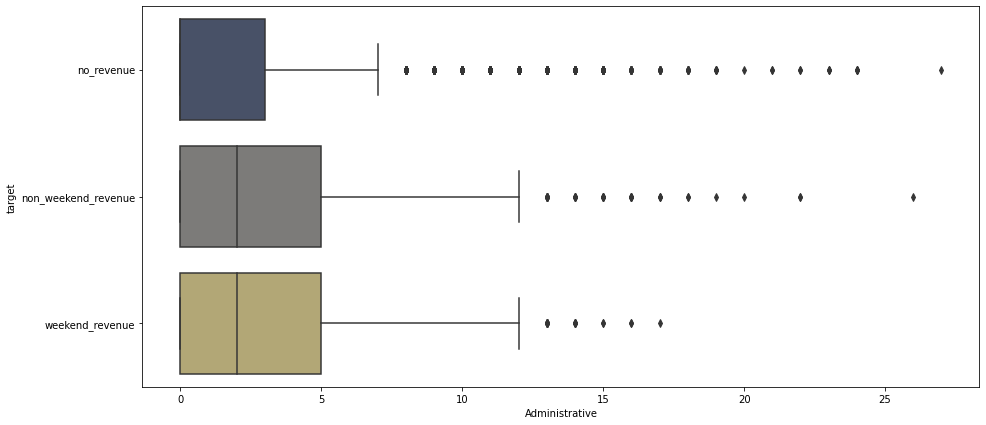

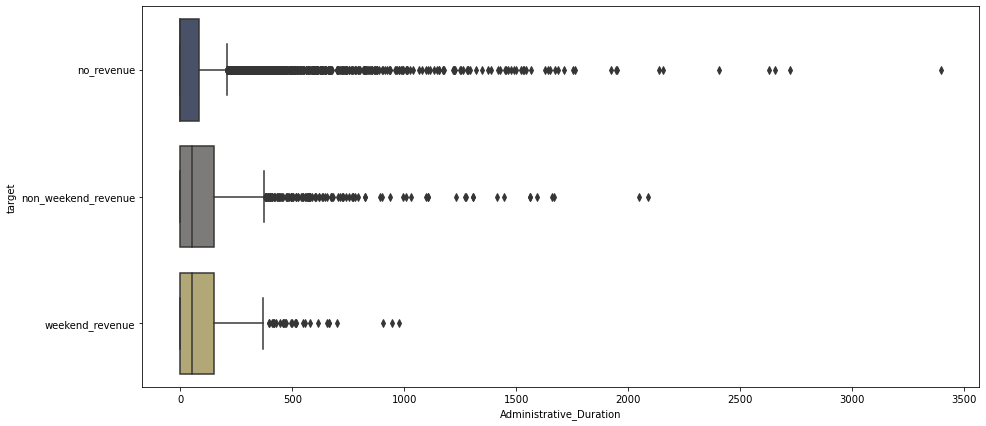

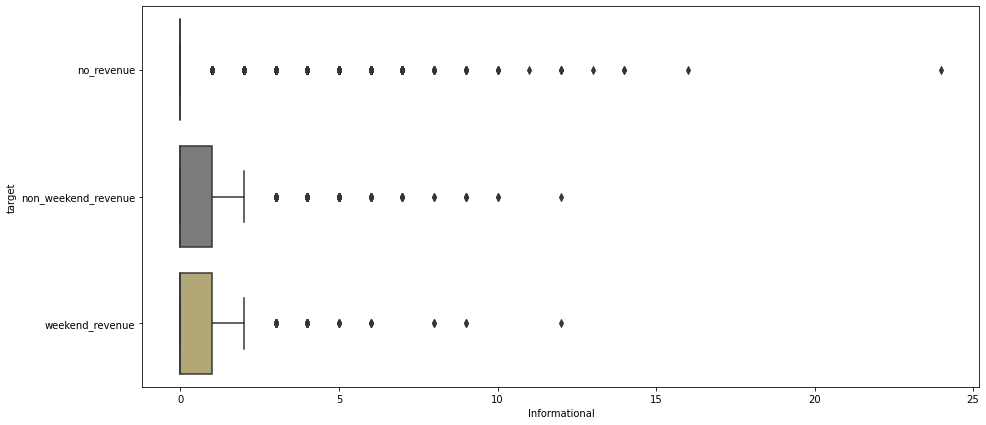

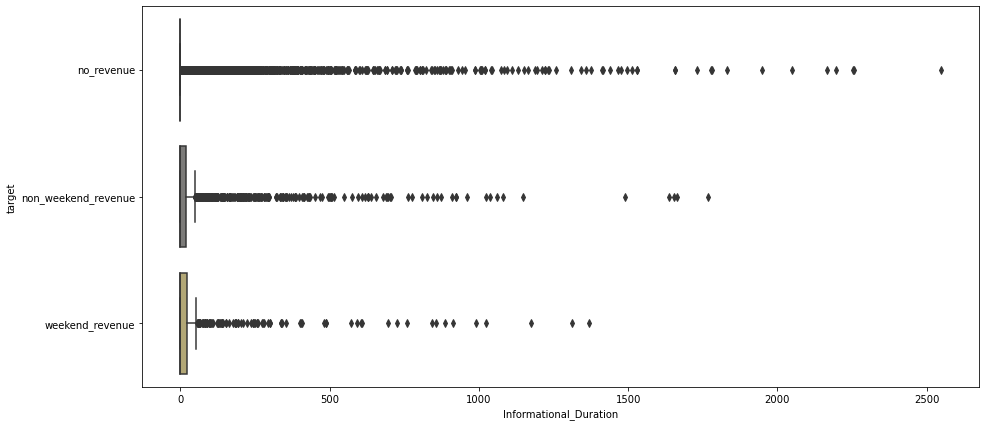

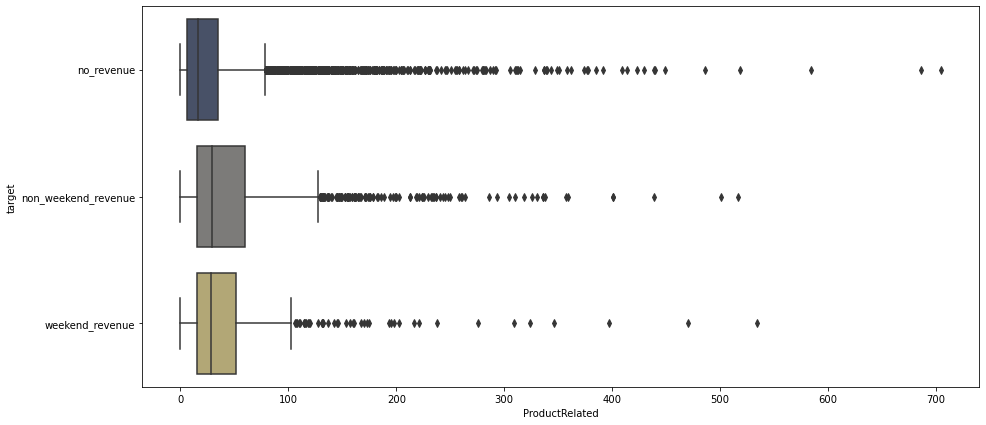

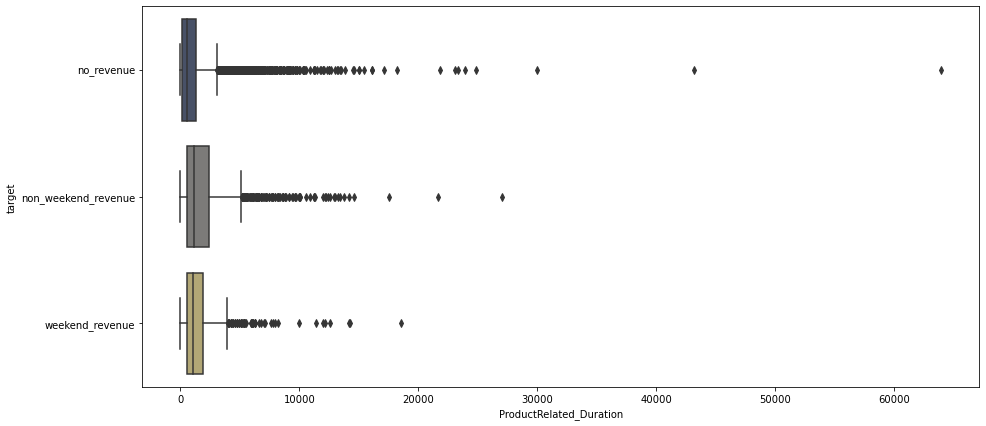

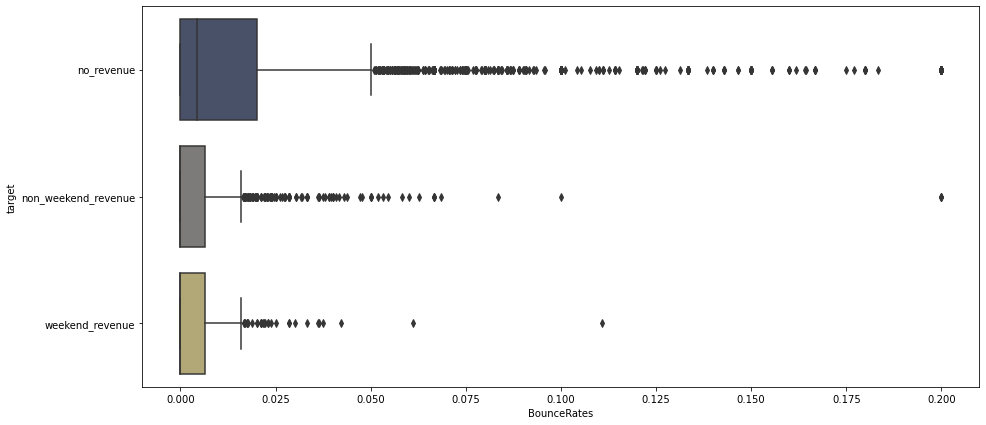

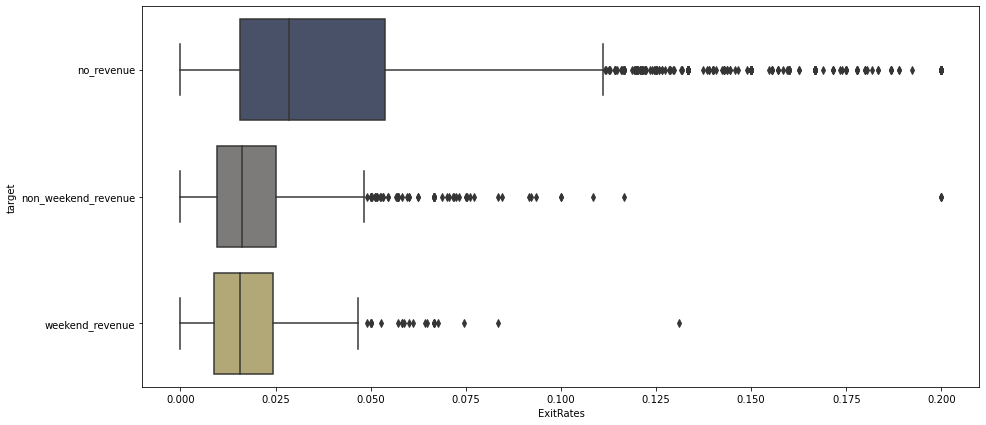

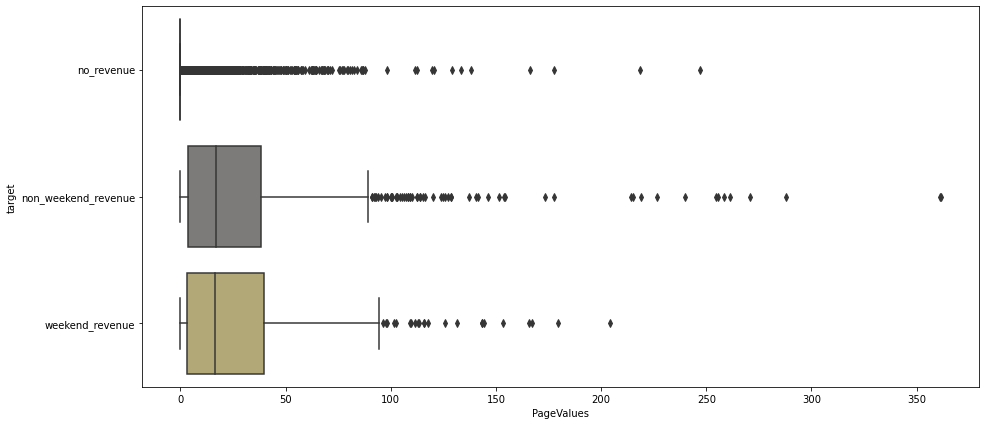

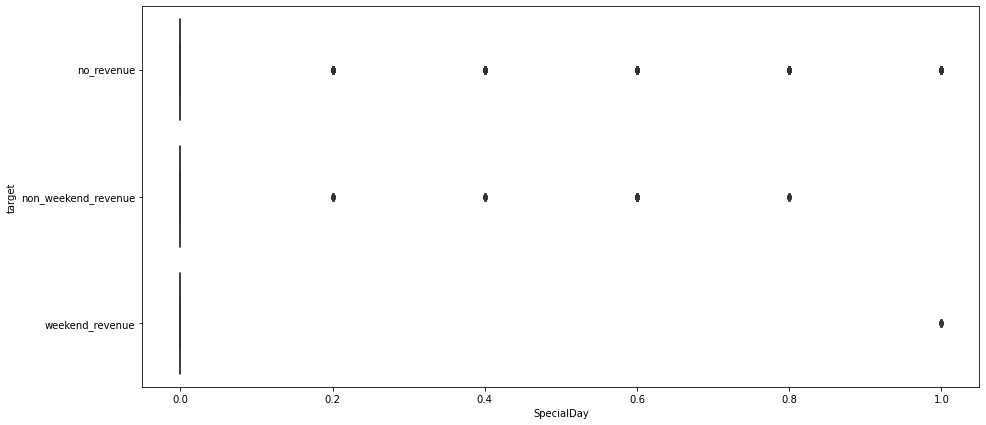

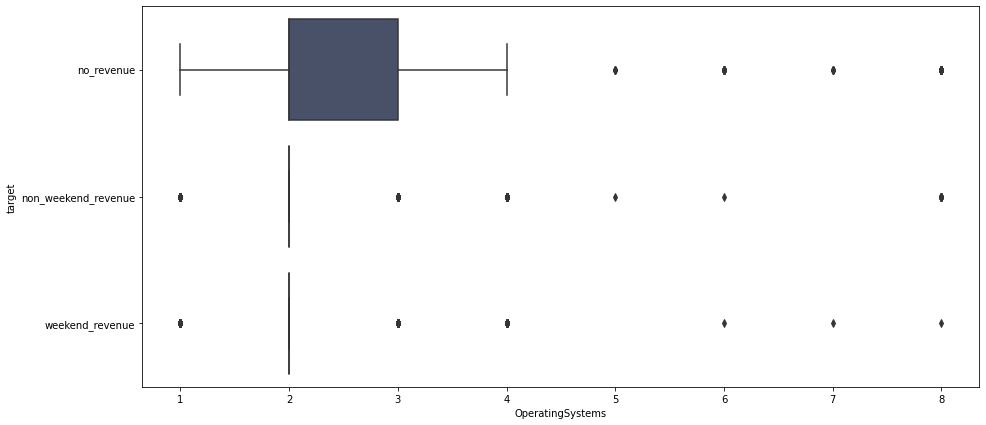

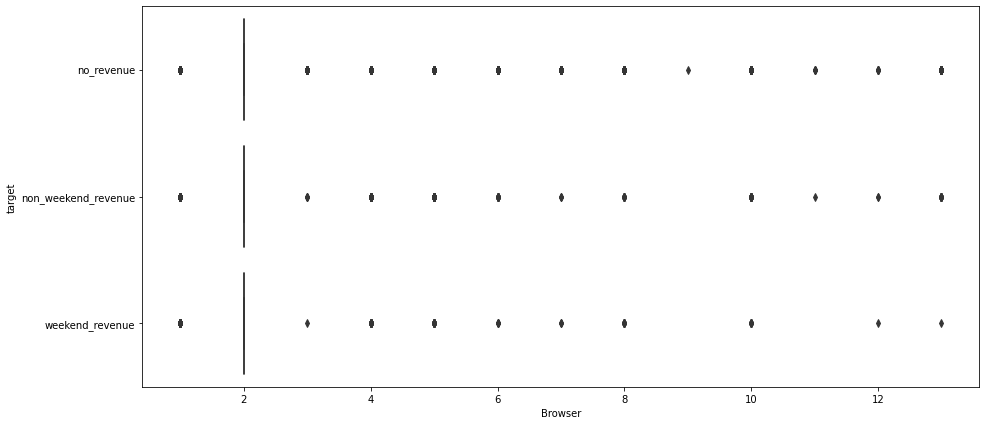

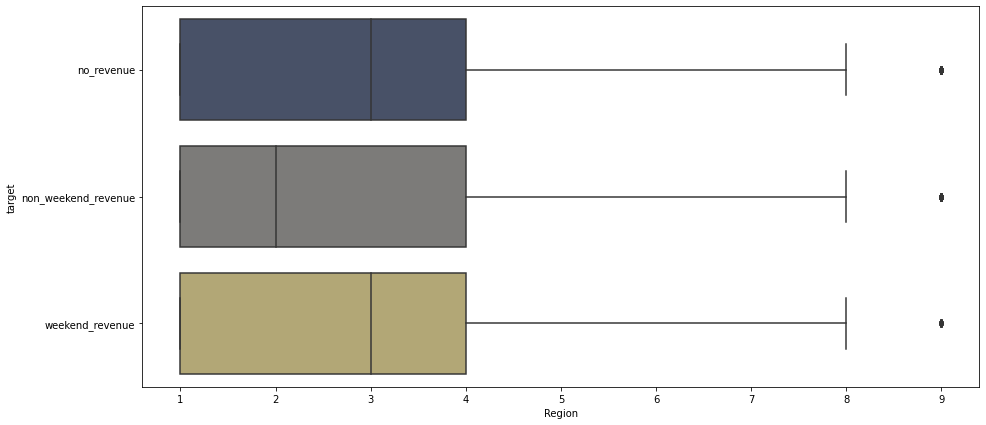

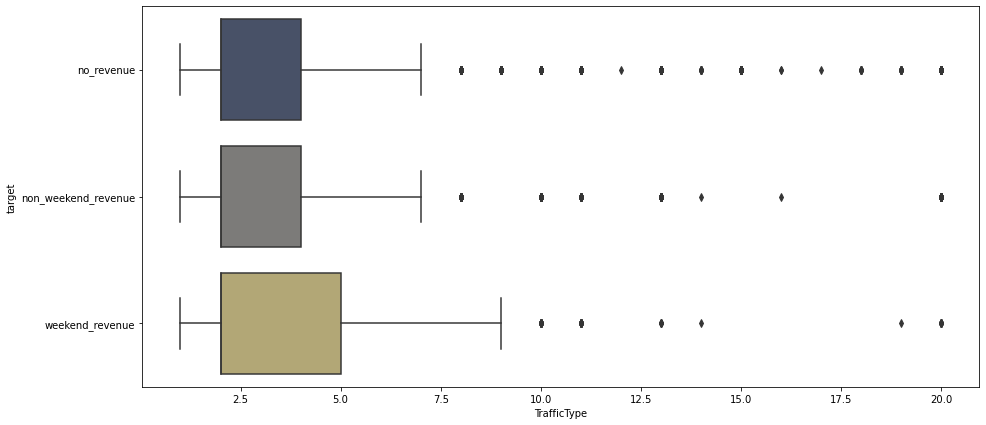

In [13]:
for i in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize =(15,7))
    sns.boxplot(y='target',x=i,data=df, palette='cividis')
    plt.show()

### Categoric Analysis

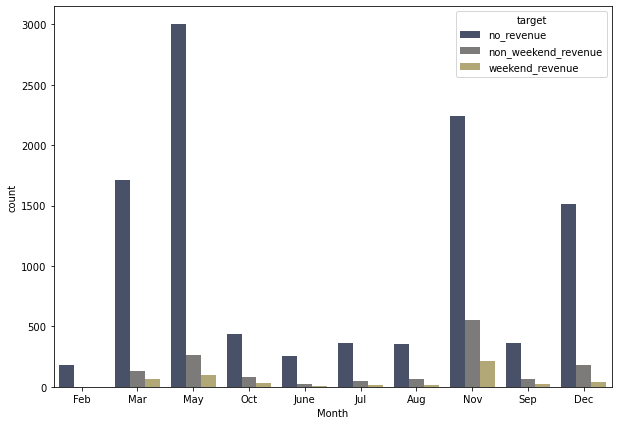

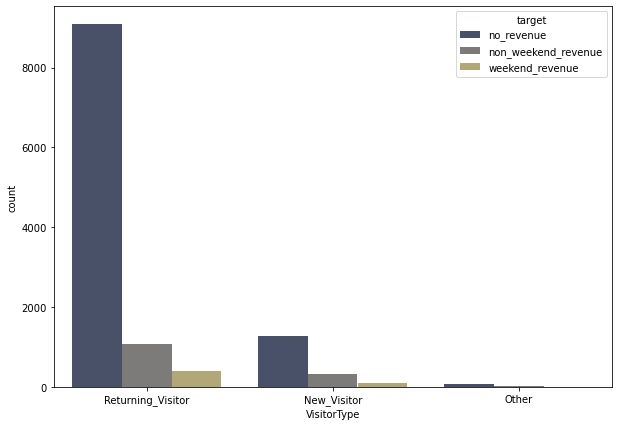

In [14]:
for i in df.select_dtypes(include=np.object).drop(['Weekend','Revenue', 'target'],axis=1).columns:
    plt.figure(figsize =(10,7))
    sns.countplot(df[i],hue=df['target'], palette='cividis')
    plt.show()

## Correlation plot

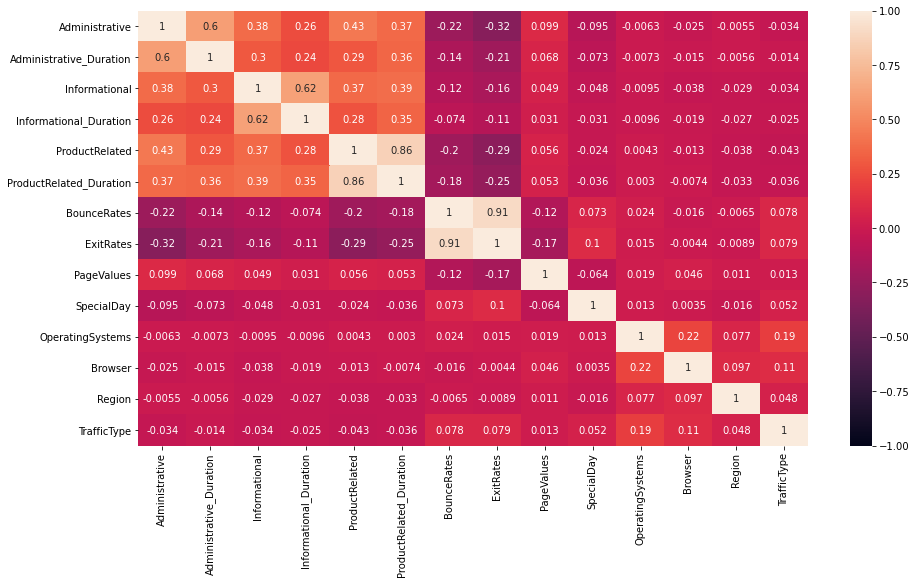

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True, vmax=1, vmin=-1)
plt.show()

### Insights from correlation plot:
#### Features to be dropped:
We see high correlation in the following pairs of features:
* ExitRates - BounceRates
* ProductRelated_Duration - ProductRelated
* Informational - Informational_Duration
* Administrative - Administrative_Duration

*Note - We can drop highly correlated features in order to overcome the "Curse of dimentionality" but in our model training we found that that these features were actually increasing the accuracy and precision of the model, so we will procede without dropping*

#### Target variable Informational_Duration:
* There are multiple columns that show less that 0.1 correlation wrt the target variable, which might be dropped during prediction of Informational_Duration

## Target Variable Understanding

### Revenue - Weekend target

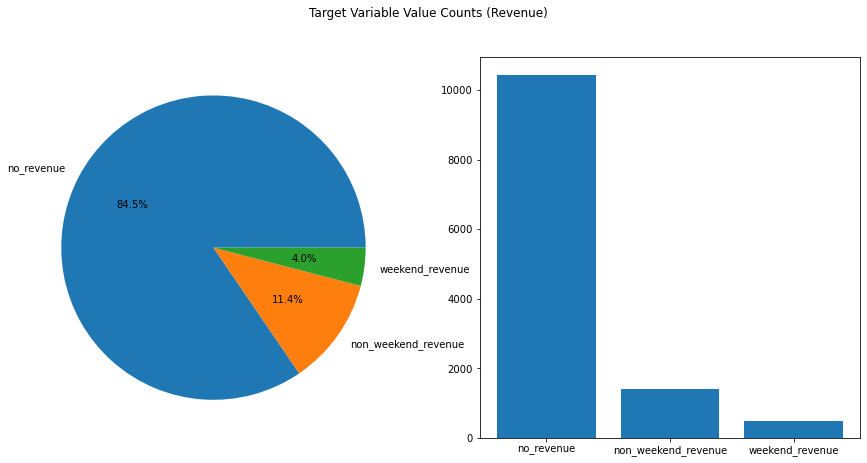

In [122]:
import matplotlib.pyplot as plt

# Calculate value counts of the target variable
value_counts = df['target'].value_counts()

# Create a pie chart and a bar chart
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.pie(value_counts, autopct='%1.1f%%', labels=value_counts.index)
plt.subplot(1, 2, 2)
plt.bar(value_counts.index, value_counts)

# Add value counts as the chart title
plt.suptitle('Target Variable Value Counts (Revenue)')

# Display the plot
plt.show()


In [11]:
df.target.value_counts()

no_revenue             10422
non_weekend_revenue     1409
weekend_revenue          499
Name: target, dtype: int64

We see **significant disbalance** in the dataset where the minority classes are sparsely represented and the smallest class, weekend_revenue is even more sparsely represented than non_weekend_revenue.

We need to apply relevant **sampling techniques** to resample our dataset to attain good precision on out minority classes since weekend_revenue and non_weekend_revenue are the primary focus of our model.

### Informatonal_Duration

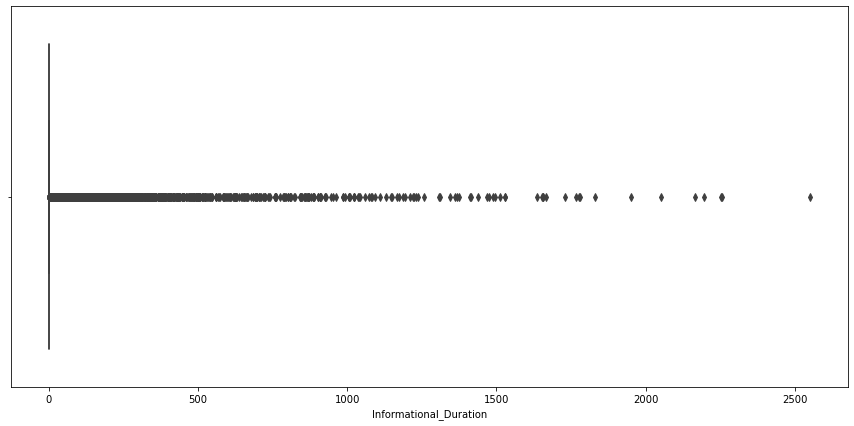

In [115]:
plt.figure(figsize=(15,7))
sns.boxplot(df['Informational_Duration'])
plt.show()

We see that **Informational_Duration** is highly skewed towards the higher side, which means that there are large outliers on the higher end. We need to apply relevant **transformation techniques** to satisfy the **normality assumption** of most regression models.

# STATISTICAL ANALYSIS

### Normality Test (Shapiro-Wilk)

In [47]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality on each numeric column
normality_results = pd.DataFrame(columns=['Column', 'p-value'])
for col in df.select_dtypes(include=np.number).columns:
    _, p_value = shapiro(df[col])
    normality_results = normality_results.append({'Column': col, 'p-value': p_value}, ignore_index=True)

# Print the normality test results
print(normality_results)

                     Column  p-value
0            Administrative      0.0
1   Administrative_Duration      0.0
2             Informational      0.0
3    Informational_Duration      0.0
4            ProductRelated      0.0
5   ProductRelated_Duration      0.0
6               BounceRates      0.0
7                 ExitRates      0.0
8                PageValues      0.0
9                SpecialDay      0.0
10         OperatingSystems      0.0
11                  Browser      0.0
12                   Region      0.0
13              TrafficType      0.0


Since all the **numeric columns fail the shapiro test for normality**, we will **procede with Kruskal-Wallis Test** on the numeric variables to determine their significance wrt the target variable.

### Kruskal-Wallis (wrt Revenue)

In [111]:
from scipy.stats import kruskal

In [51]:
# Perform Kruskal-Wallis test for each numeric column
results = []
for col in df.select_dtypes(include=np.number).columns.tolist():
    groups = [df[df['target'] == target][col] for target in df['target'].unique()]
    stat, p_value = kruskal(*groups)
    results.append({'Column': col, 'Kruskal-Wallis statistic': stat, 'p-value': p_value})


kruskal_results = pd.DataFrame(results)

kruskal_results = kruskal_results.sort_values('p-value') # Sort the results by p-value in ascending order

categorize = lambda p_value: 'Significant' if p_value < 0.05 else 'Non-Significant' if p_value < 0.1 else 'Non-Informative'
kruskal_results['Category'] = kruskal_results['p-value'].map(categorize)

print("Kruskal-Wallis Test Results:")
kruskal_results

Kruskal-Wallis Test Results:


,Column,Kruskal-Wallis statistic,p-value,Category
8,PageValues,4837.242876,0.000000e+00,Significant
7,ExitRates,799.692062,2.233959e-174,Significant
5,ProductRelated_Duration,580.604376,8.382270e-127,Significant
4,ProductRelated,486.468558,2.315767e-106,Significant
0,Administrative,348.207911,2.441253e-76,Significant
1,Administrative_Duration,331.730251,9.240410e-73,Significant
6,BounceRates,274.904295,2.019718e-60,Significant
2,Informational,160.414994,1.466650e-35,Significant
3,Informational_Duration,155.002305,2.196227e-34,Significant
9,SpecialDay,95.508696,1.822008e-21,Significant


### Skewness

In [110]:
numeric_columns = df.select_dtypes(include=np.number).columns
skewness_values = df[numeric_columns].skew()

# Print the skewness values
for column, skewness in skewness_values.items():
    print(f"Skewness of {column}:{skewness:.2f}")

Skewness of Administrative:1.96
Skewness of Administrative_Duration:5.62
Skewness of Informational:4.04
Skewness of Informational_Duration:7.58
Skewness of ProductRelated:4.34
Skewness of ProductRelated_Duration:7.26
Skewness of BounceRates:2.95
Skewness of ExitRates:2.15
Skewness of PageValues:6.38
Skewness of SpecialDay:3.30
Skewness of OperatingSystems:2.07
Skewness of Browser:3.24
Skewness of Region:0.98
Skewness of TrafficType:1.96


# MODEL BUILDING: 
We build two separate models with separate data preparation and treatment: 
* **Revenue** 
* **Informational_Duration**

In [106]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# MODEL 1: To predict the Revenue and whether that particular revenue is on the weekend or not

## Data Resampling
Since there is high imbalance in the data wrt the three classes in out 'target' column. We will resample the data to make the three classes have similar frequency in our feeder data for the model.

We achieve this in two steps:
* We begin by **Downsampling** the majority class "no_revenue" that represents 84.5% datapoints in the raw dataset.
* We will then **Upsample** the smallest minority class "weekend_revenue" that represents only 4% datapoints.

By doing these two stemps we will get a balanced dataset which can be used for model training.

In [ ]:
# Separate majority and minority classes
majority_class = 'no_revenue'
minority_classes = ['non_weekend_revenue', 'weekend_revenue']

df_majority = df[df['target'] == majority_class]
df_minority = df[df['target'].isin(minority_classes)]

#### Downsampling no_revenue class

In [16]:
df_majority_downsampled = resample(df_majority, 
                                   replace=False, 
                                   n_samples=len(df_minority))      # Downsample the majority class

# Displaying current state of data after downsampling of no_revenue
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
print(df_downsampled['target'].value_counts())

no_revenue             1908
non_weekend_revenue    1409
weekend_revenue         499
Name: target, dtype: int64


#### Upsampling the minority classes

In [17]:
# Upsampling the minority classes
df_minority_upsampled = pd.concat([resample(df_minority[df_minority['target'] == cls], 
                                             replace=True, 
                                             n_samples=len(df_majority_downsampled)) for cls in minority_classes])


# concatenating upsampled and downsampled to get the final balanced feeder data
df_balanced = pd.concat([df_majority_downsampled, df_minority_upsampled])
print(df_balanced['target'].value_counts())

weekend_revenue        1908
non_weekend_revenue    1908
no_revenue             1908
Name: target, dtype: int64


## Train Test Split

In [19]:
train,test=train_test_split(df_balanced, train_size=0.7,random_state=5)
train.shape,test.shape

((4006, 19), (1718, 19))

## Encoding

In [21]:
for i in train.select_dtypes(exclude=np.number).columns:
    le=LabelEncoder()
    le.fit(train[i])
    train[i]=le.transform(train[i])
    test[i]=le.transform(test[i])

## X-Y Split

In [24]:
xtrain_rev=train.iloc[:,:-3]
ytrain_rev=train['target']
xtest_rev=test.iloc[:,:-3]
ytest_rev=test['target']
xtrain_rev.shape,ytrain_rev.shape,xtest_rev.shape,ytest_rev.shape

((4006, 16), (4006,), (1718, 16), (1718,))

## Scaling

We will apply Standard Scaling on all the variable to remove the effect  of units.

In [27]:
for i in xtrain_rev.columns:
    xtrain_arr = xtrain_rev[i].values.reshape(-1,1)
    xtest_arr = xtest_rev[i].values.reshape(-1,1)
    ss = StandardScaler()
    ss.fit(xtrain_arr)
    xtrain_rev[i] = ss.transform(xtrain_arr)
    xtest_rev[i] = ss.transform(xtest_arr)

# Model Training (Revenue)

Since it's a classification model we'll use **Various Classification Algorithms** to see which algorithm performs best. These include Simple algorithms as well as Bagging and Boosting algorithms.

There are two steps here:
1. Apply all models and get **classification report**.
2. Focussing on the **Precision and Recall**, Chose the best algorithm and **Hyperparameter Tune** it to get final model.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

####  Feature Selection: Dropping Non-Informative columns (Based on Kruskal-Wallis Results)

In [42]:
xtrain_rev_fs = xtrain_rev.drop(['TrafficType'], axis = 1)
xtest_rev_fs = xtest_rev.drop(['TrafficType'], axis = 1)

In [43]:
models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
          'KNN_Classifier': KNeighborsClassifier(n_neighbors=5),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
          'Adaboost': AdaBoostClassifier(),
         'GradientBoost':GradientBoostingClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev_fs, ytrain_rev)
    ypred_rev = model.predict(xtest_rev_fs)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.64      0.87      0.74       556
           1       0.54      0.32      0.40       599
           2       0.46      0.50      0.48       563

    accuracy                           0.56      1718
   macro avg       0.55      0.56      0.54      1718
weighted avg       0.55      0.56      0.54      1718


KNN_CLASSIFIER
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       556
           1       0.68      0.54      0.60       599
           2       0.61      0.76      0.68       563

    accuracy                           0.65      1718
   macro avg       0.66      0.66      0.65      1718
weighted avg       0.66      0.65      0.65      1718


DECISIONTREE
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       556
           1       0.83      0.81      0.82       599
           2       0.86   

## Final Model (Revenue)

Based on the above result, looking at the **Precision** and **Accuracy** scores of the minority classes (Which are our main target classes). We take the **Random Forest Classifier** as our final model and we will try to improvise on it by preforming hyperparameter tuning.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(xtrain_rev_fs, ytrain_rev)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Predict on the test set using the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(xtest_rev_fs)

# Print the classification report
print("Classification Report:")
print(classification_report(ytest_rev, y_pred))


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       556
           1       0.87      0.89      0.88       599
           2       0.92      0.95      0.93       563

    accuracy                           0.90      1718
   macro avg       0.90      0.90      0.90      1718
weighted avg       0.90      0.90      0.90      1718



In [108]:
best_rf_model

RandomForestClassifier(max_features='auto', random_state=42)

# MODEL 2: Find the Informational_Duration using the Ensemble learning algorithm

Informational_Duration being a continous variable, we will try various **regression algorithms** and see which model works best. We will also apply different transformation techniques to imporve the model. To do this we will first create an **OLS base model** to see hoe the data works with regression and the based on the results, we will apply relevant transformation techniques.

We will have three steps:
1. Create **Base Model**
2. **Improvise** on the Base model and train various **Ensemble Algorithm**
3. **Hyperparameter tune** the Final Model

## Train-test Split

In [55]:
train,test=train_test_split(df, train_size=0.7,random_state=5)
train.shape,test.shape

((8631, 19), (3699, 19))

## Encoding

In [56]:
for i in train.select_dtypes(exclude=np.number).columns:
    le=LabelEncoder()
    le.fit(train[i])
    train[i]=le.transform(train[i])
    test[i]=le.transform(test[i])

## X-y Split

In [58]:
xtrain_inf=train.drop(['target','Informational_Duration'],axis=1)
ytrain_inf=train['Informational_Duration']
xtest_inf=test.drop(['target','Informational_Duration'],axis=1)
ytest_inf=test['Informational_Duration']
xtrain_inf.shape,ytrain_inf.shape,xtest_inf.shape,ytest_inf.shape

((8631, 17), (8631,), (3699, 17), (3699,))

## Scaling

In [59]:
for i in xtrain_inf.columns:
    xtrain_arr = xtrain_inf[i].values.reshape(-1,1)
    xtest_arr = xtest_inf[i].values.reshape(-1,1)
    ss = StandardScaler()
    ss.fit(xtrain_arr)
    xtrain_inf[i] = ss.transform(xtrain_arr)
    xtest_inf[i] = ss.transform(xtest_arr)

# Model Training (Informational_Duration)

## Base Model

In [71]:
import statsmodels.api as sm

In [74]:
# OLS Base Model
xtrain_with_constant = sm.add_constant(xtrain_inf)
ols_model = sm.OLS(ytrain_inf, xtrain_with_constant)
ols_results = ols_model.fit()

print(ols_results.summary())

                              OLS Regression Results                              
Dep. Variable:     Informational_Duration   R-squared:                       0.432
Model:                                OLS   Adj. R-squared:                  0.431
Method:                     Least Squares   F-statistic:                     385.6
Date:                    Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                            04:41:48   Log-Likelihood:                -52551.
No. Observations:                    8631   AIC:                         1.051e+05
Df Residuals:                        8613   BIC:                         1.053e+05
Df Model:                              17                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

#### Insights from Base Model:
* Based on the P-Values the columns: **"Administrative", "BounceRates", "ExitRates", "PageValues", "TrafficType", "VisitorType"** and **"Revenue"**, (having p-value >0.05) seem to be statistically insignificant in predicting Informational_Duration and hence can be dropped.
* High values of Jaques-Bera Probability shows affect non-normality in the data.

## Improvising the Base Model

We will apply two operations, based on the insights from the base model, on the data to improve the model:
* **Box-Cox Transformation**
* **Feature Selection**

### Box-Cox Transformation

In [93]:
from scipy.stats import boxcox

In [96]:
df_transformed = df.copy()
numeric_columns = df.select_dtypes(include=np.number).columns

# Apply Box-Cox transformation
for col in numeric_columns:
    # Add a small constant to avoid division by zero
    transformed, _ = boxcox(df[col] + 0.01)
    df_transformed[col] = transformed

### Applying Data Preparation

In [97]:
# Traintest split
train,test=train_test_split(df_transformed, train_size=0.7,random_state=5)
train.shape,test.shape

# Encoding
for i in train.select_dtypes(exclude=np.number).columns:
    le=LabelEncoder()
    le.fit(train[i])
    train[i]=le.transform(train[i])
    test[i]=le.transform(test[i])
    
# X-y Split
xtrain_inf=train.drop(['target','Informational_Duration'],axis=1)
ytrain_inf=train['Informational_Duration']
xtest_inf=test.drop(['target','Informational_Duration'],axis=1)
ytest_inf=test['Informational_Duration']

# Scaling
for i in xtrain_inf.columns:
    xtrain_arr = xtrain_inf[i].values.reshape(-1,1)
    xtest_arr = xtest_inf[i].values.reshape(-1,1)
    ss = StandardScaler()
    ss.fit(xtrain_arr)
    xtrain_inf[i] = ss.transform(xtrain_arr)
    xtest_inf[i] = ss.transform(xtest_arr)

### Feature Selection

In [98]:
insignificant_columns = ["Administrative", "BounceRates", "ExitRates", "PageValues", "TrafficType", "VisitorType", "Revenue"]

xtrain_inf_fs = xtrain_inf.drop(insignificant_columns, axis=1)
xtest_inf_fs = xtest_inf.drop(insignificant_columns, axis=1)

## Ensemle Algorithms

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [103]:
models = {'random_forest' : RandomForestRegressor(),
        'mlp_regressor' : MLPRegressor(),
        'gradient_boosting' : GradientBoostingRegressor(),
        'xgboost_regressor' : XGBRegressor(),
        'lightgbm_regressor' : LGBMRegressor()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_inf_fs, ytrain_inf)
    ypred_inf = model.predict(xtest_inf_fs)
    
    mse = round(mean_squared_error(ytest_inf, ypred_inf),2)
    mae = round(mean_absolute_error(ytest_inf, ypred_inf),2)
    r2 = round(r2_score(ytest_inf, ypred_inf),3)
    
    print(name.upper())
    print("Mean Squared Error:\t", mse)
    print("Mean Absolute Error:\t", mae)
    print("R^2 Score:\t\t", r2)
    print("------------------------------------")
    print()

RANDOM_FOREST
Mean Squared Error:	 7.88
Mean Absolute Error:	 0.64
R^2 Score:		 0.9
------------------------------------

MLP_REGRESSOR
Mean Squared Error:	 9.17
Mean Absolute Error:	 0.89
R^2 Score:		 0.883
------------------------------------

GRADIENT_BOOSTING
Mean Squared Error:	 7.85
Mean Absolute Error:	 0.72
R^2 Score:		 0.9
------------------------------------

XGBOOST_REGRESSOR
Mean Squared Error:	 9.1
Mean Absolute Error:	 0.81
R^2 Score:		 0.884
------------------------------------

LIGHTGBM_REGRESSOR
Mean Squared Error:	 8.45
Mean Absolute Error:	 0.73
R^2 Score:		 0.893
------------------------------------



## Final Model (Informational_Duration)

Assesing the performance of all the above models, we choose **GradientBoostingRegressor** for our final model. We will use GridSearchCV to find the best hyperparameter and get the final best model.

In [104]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [105]:
# Create the Gradient Boosting regressor
gb_reg = GradientBoostingRegressor()

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(gb_reg, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(xtrain_inf_fs, ytrain_inf)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
ypred_inf = best_model.predict(xtest_inf_fs)

# Calculate performance metrics
mse = mean_squared_error(ytest_inf, ypred_inf)
mae = mean_absolute_error(ytest_inf, ypred_inf)
r2 = r2_score(ytest_inf, ypred_inf)

# Print the best parameters and performance metrics
print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error: 7.62829519015532
Mean Absolute Error: 0.6733360295862728
R^2 Score: 0.9030441125002594


In [107]:
best_model

GradientBoostingRegressor(learning_rate=0.05)